<a href="https://colab.research.google.com/github/Acottle1031/Sales-Predictions-Project/blob/main/SalesProjectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring & Cleaning Data

In [238]:
# Take care of our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
filename = '/content/drive/MyDrive/01 Week 1 - Python/Food Sales Predictions Project/sales_predictions.csv'

In [160]:
# Displaying Data
projections_df = pd.read_csv('/content/drive/MyDrive/01 Week 1 - Python/Food Sales Predictions Project/sales_predictions.csv')
projections_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [161]:
#using df.shape we can see there are 8523 rows and 12 columns
projections_df.shape

(8523, 12)

2) What are the datatypes of each variable

In [162]:
# using df.dtypes we can see the individual data type for each variable
projections_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [163]:
# By using df.duplicated().sum() we can have pandas go through all rows to check for duplicates
# Here we can see there are no duplicates
projections_df.duplicated().sum()


0

4) Identify missing values.

In [164]:
# By using .isna().sum() we can see the total number of missing values per column,
# 1463 missing values in Item_Weight and 2410 missing in Outlet_Size
projections_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [165]:
# Outlet_Size is missing a lot of data, but could be useful so we'll keep the column
# We'll want to impute the average outlet size into the missing value spaces
# Item_weight also has a lot of missing values and may possibly be useful for projections so we'll also keep this
# Same thing as with Outlet_Size, we'll impute the average weight
outlet_size_average = projections_df['Outlet_Size'].mode().iloc[0]
item_weight_average = projections_df['Item_Weight'].mode
projections_df['Outlet_Size'].fillna(outlet_size_average, inplace=True)
projections_df['Item_Weight'].fillna(item_weight_average, inplace=True)

6) Confirm that there are no missing values after addressing them.

In [166]:
# Like before, using .isna().sum() we can see the total number of all missing values in our dataframe after changes
projections_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [167]:
# Using .value_counts we can see that there are multiple examples of Regular and Low Fat (LF, reg, low fat)
# We'll want to change those to match the already existing values
projections_df['Item_Fat_Content'].value_counts()
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('LF', 'Low Fat')
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('reg', 'Regular')
projections_df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [168]:
# Using df.describe we can see a summary of numerical columns including min, max, mean
projections_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


#Visualizing Our Data 

your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each: Histogram to view the distributions of various features in your dataset. Boxplot to view statistical summaries of various features in your dataset. Heatmap of the correlation between features.

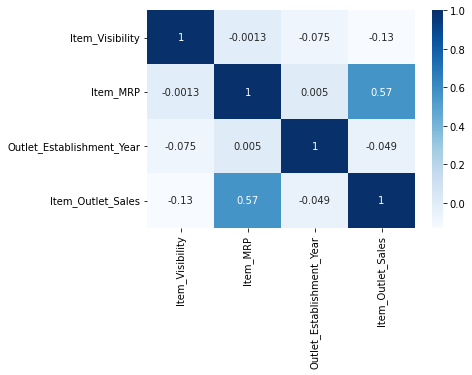

In [169]:
corr = projections_df.corr()
sns.heatmap(corr, cmap='Blues', annot = True);
# Starting with a correlation heat map to see what data might correlate to each other for further exploration if needed
# Here we see in regards to sales the only metric with a positive correlation is Item_MRP 
# We also see that the year established has a negative correlation with sales
# Additionally, it looks like the Outlet establishment year has a severely negative correlation with Item Visibility

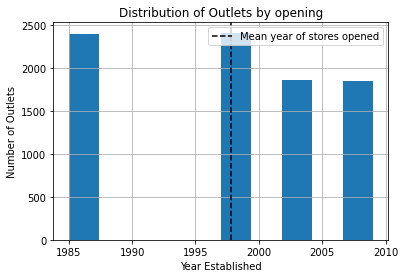

In [170]:
# Next we'll do a Histogram to check out distribution of outlets by opening year
mean = projections_df['Outlet_Establishment_Year'].mean()
ax = projections_df['Outlet_Establishment_Year'].hist();
ax.set(xlabel = 'Year Established', ylabel = 'Number of Outlets', title = 'Distribution of Outlets by opening');
ax.axvline(mean, color='k', ls='--', label = f'Mean year of stores opened')
ax.legend();


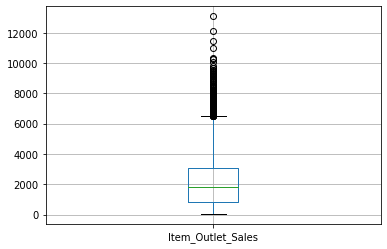

In [171]:
projections_df.boxplot('Item_Outlet_Sales');
#using a box plot for sales to show a summary of our sales data
#We see that 0 would be our minimum sales, our 25th percentile of our stores are between $1000 - $1900
#Our median sales just under $2000 per store 
#75th percentile is about $2000-$3000 
#Our max is about $6500 in sales with anything after that being an outlier 

#Explaining Our Data

Your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

Q1: How have sales changed over time?

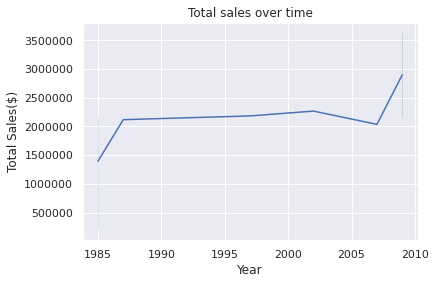

In [228]:
sales_ot = projections_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
sns.set(style='darkgrid')
ax = sns.lineplot(data=projections_df, x='Outlet_Establishment_Year', y=sales_ot)
plt.ticklabel_format(style='plain')
ax.set(title='Total sales over time', xlabel='Year', ylabel='Total Sales($)');
# We can see that sales overall have increased over time, beginning at $1.5 million and increasing to about $2.6 million

Q2: Which types of items are selling the most?





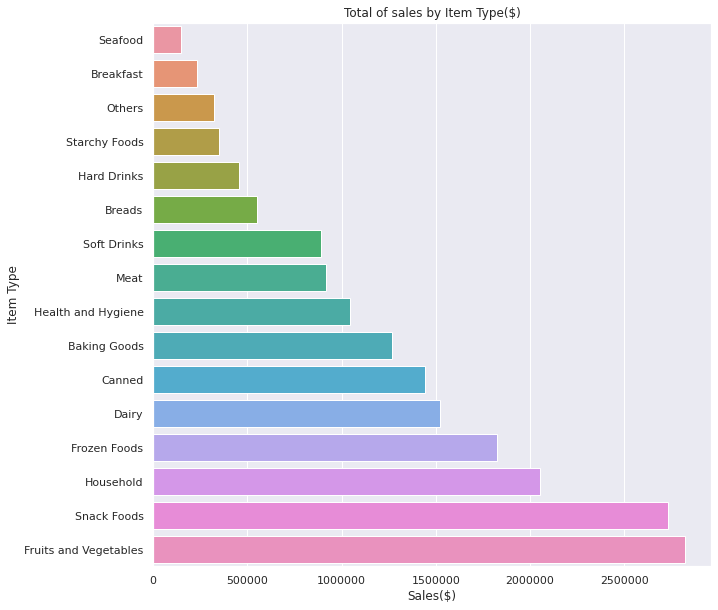

In [296]:
plt.figure(figsize=(10,10))
item_sales_type = projections_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()
ax = sns.barplot(data=projections_df, x=item_sales_type.values, y=item_sales_type.index, ci=None);
ax.set(title='Total of sales by Item Type($)', xlabel='Sales($)', ylabel='Item Type');
ax.get_xaxis().get_major_formatter().set_scientific(False)
# We can see here that Fruits & Vegetables are selling the most with, Snack foods in a close 2nd